<a href="https://colab.research.google.com/github/rpezoa/mlvalpo/blob/main/regresionMulti_MLvalpo_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import time


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def plot_results(y_test,y_pred):
  targets = ["T_eff", "v sin i"]
  for i, target in enumerate(targets):
      print(f"{target} – Linear Regression")
      print(f"  MSE: {mean_squared_error(y_test.values[:, i], y_pred[:, i]):.2f}")
      print(f"  MAE: {mean_absolute_error(y_test.values[:, i], y_pred[:, i]):.2f}")
      print(f"  R²:  {r2_score(y_test.values[:, i], y_pred[:, i]):.3f}\n")

      plt.figure(figsize=(5, 5))
      sns.scatterplot(x=y_test.values[:, i], y=y_pred[:, i], alpha=0.4)
      plt.plot([y_test.values[:, i].min(), y_test.values[:, i].max()],
              [y_test.values[:, i].min(), y_test.values[:, i].max()], 'r--')
      plt.xlabel(f"True {target}")
      plt.ylabel(f"Predicted {target}")
      plt.title(f"{target} – Linear Regression")
      plt.grid(True)
      plt.tight_layout()
      plt.show()

In [2]:
# Dataset provided by Daniela Turis, IFA-UV.

!gdown https://drive.google.com/uc?id=1m_GajQqDRcKrH8_ExG_0Yp_sQ4MrhZbN

Downloading...
From: https://drive.google.com/uc?id=1m_GajQqDRcKrH8_ExG_0Yp_sQ4MrhZbN
To: /content/df_ZPEKTR_limb_lineal.csv
100% 19.1M/19.1M [00:00<00:00, 101MB/s] 


In [3]:
data=pd.read_csv('df_ZPEKTR_limb_lineal.csv')
data.head()

,4460.1,4460.2,4460.3,4460.4,4460.5,4460.6,4460.7,4460.8,4460.9,4461.0,...,vsini,M/M⊙,R/R⊙,V/Vc,L*,Ω/Ωc,Tpole,Teq,gpole,geq
0,0.996583,0.996529,0.996452,0.996362,0.996264,0.996160,0.996052,0.995942,0.995830,0.995717,...,228.0,15.0,5.79,0.75,4.105,0.912,28000.0,23690.0,4.20,4.02
1,0.996234,0.996208,0.996180,0.996141,0.996108,0.996074,0.996027,0.995962,0.995851,0.995678,...,309.0,17.0,5.75,0.77,4.230,0.928,30000.0,25014.0,4.25,4.06
2,0.997128,0.996958,0.996770,0.996573,0.996368,0.996163,0.995957,0.995746,0.995530,0.995321,...,254.0,10.0,8.42,0.65,3.857,0.836,19000.0,16859.0,3.63,3.50
3,0.993683,0.993541,0.993413,0.993277,0.993126,0.992986,0.992836,0.992683,0.992531,0.992366,...,351.0,12.0,5.31,0.68,3.351,0.860,18000.0,15772.0,4.12,3.98
4,0.995026,0.994887,0.994749,0.994607,0.994464,0.994324,0.994183,0.994040,0.993885,0.993727,...,310.0,12.0,6.35,0.65,3.778,0.842,21000.0,18578.0,3.96,3.83


In [14]:
X = data.iloc[:,0:170] # X matrix containing the flux of the spectral lines
y_input = data.iloc[:,170:176] # input parameters of ZPEKTR
y_output = data.iloc[:,176:] # output parameters of ZPEKTR
y = data[["<Teff>", "vsini"]] # y matrix containing the values we want to predict

In [15]:
y

,<Teff>,vsini
0,25502.0,228.0
1,27478.0,309.0
2,18315.0,254.0
3,17238.0,351.0
4,20154.0,310.0
...,...,...
10686,17656.0,181.0
10687,26995.0,220.0
10688,20213.0,329.0
10689,20104.0,346.0


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)


T_eff – Linear Regression
  MSE: 50993.62
  MAE: 166.14
  R²:  0.997



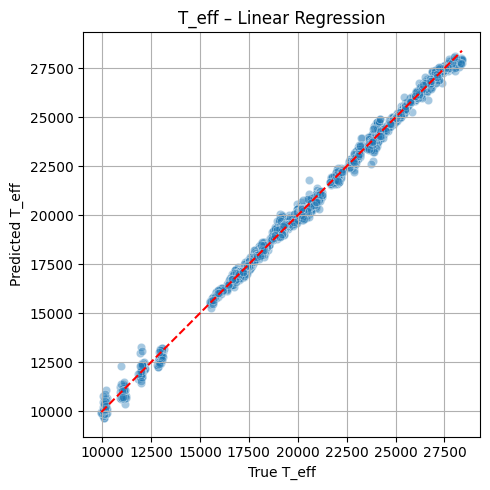

v sin i – Linear Regression
  MSE: 20.18
  MAE: 3.38
  R²:  0.997



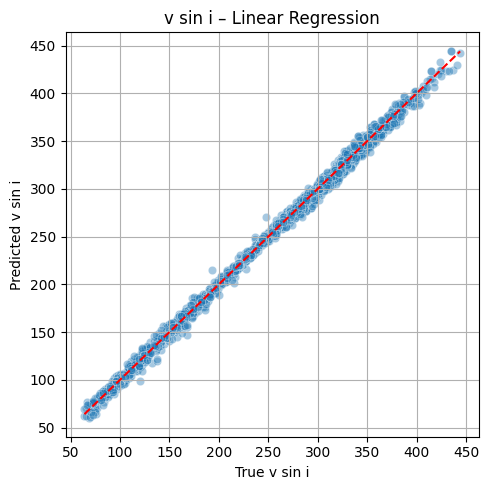

In [40]:
plot_results(y_test,y_pred_lr)

In [42]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred_tree = model.predict(X_test)


T_eff – Linear Regression
  MSE: 484690.36
  MAE: 492.16
  R²:  0.971



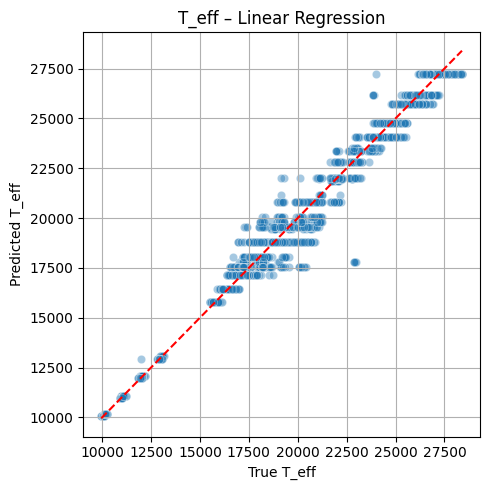

v sin i – Linear Regression
  MSE: 1699.36
  MAE: 31.80
  R²:  0.761



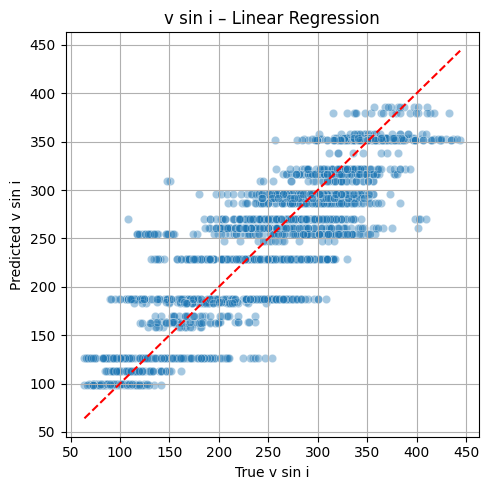

In [43]:
plot_results(y_test, y_pred_tree)

T_eff – Linear Regression
  MSE: 19603.61
  MAE: 80.50
  R²:  0.999



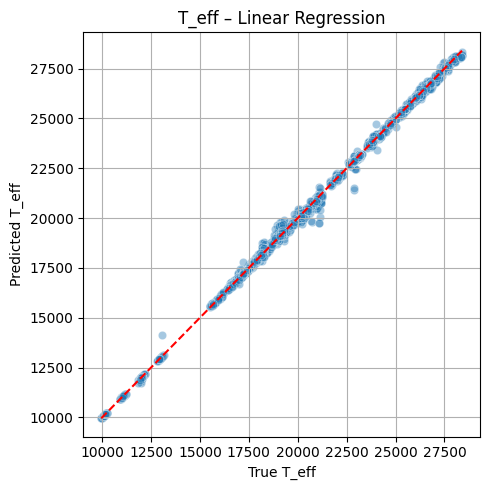

v sin i – Linear Regression
  MSE: 46.32
  MAE: 4.53
  R²:  0.993



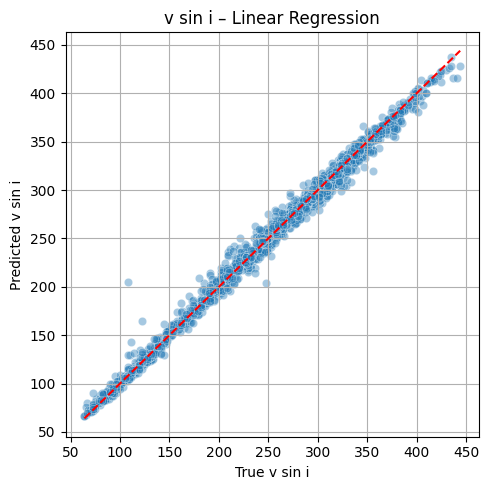

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

plot_results(y_test, y_pred_rf)

T_eff – Linear Regression
  MSE: 2801310.52
  MAE: 1405.09
  R²:  0.832



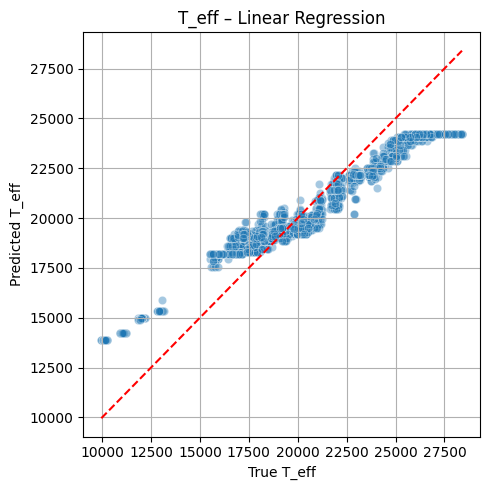

v sin i – Linear Regression
  MSE: 1103.60
  MAE: 27.49
  R²:  0.845



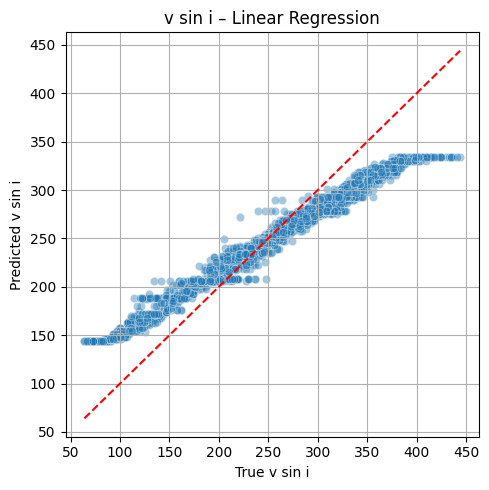

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

base_model = GradientBoostingRegressor(n_estimators=10, random_state=42)
model = MultiOutputRegressor(base_model)

model.fit(X_train, y_train)
y_pred_gb = model.predict(X_test)

plot_results(y_test, y_pred_gb)


# Probemos en líneas observadas